<H1> Problem </H>

Find a reasonable <b>(less crime rate and not too far from city center)</b> suburb to live in Melbourne

<H5> Discussion </H5>

Melbourne has been named the world’s most liveable city for seven years in a row [1]. In 2018, Melbourne performed best in healthcare, education and infrastructure. Melbourne not only maintained its score in stability but also gained points in culture and environment.

This makes Melbourne a natural choice:
<ul>
  <li> For people to live, work or study </li>
</ul>

Though, Melbourne is a very big city. There are two issues:

<ol>
<li> Firstly, all neighborhoods are not safe to live in due to high crime rates</li>
<li> Secondly, a neighborhood may be safe but it can be in a remote area. Which makes it less suitable to live </li>
</ol>


Someone, who is raised in Melbourne will know about it. But, that is not the case for people living in other Australian states, foreigners, or immigrants. It becomes important to find such information before renting or buying a house in a suburb of Melbourne. Because, the property agents do not always provide a complete information.  

Good suburbs will likely have less crime rate. At the same time, it will be good for suburb to have at-least one of the following nearby venues: 
<ul>
    <li> School </li>
    <li> Park </li>
    <li> Resturants </li>
    <li> Train Stations </li>
  </ul>

In this project, I will find top 10 suburbs of Melbourne which
<ol>
<li> Have least crime rate compared to others </li>
<li> Are not very far away from Melbourne City Center, such as within 40 KM </li>
<li> Have quite a few venues (i.e., around 40 with in radius of 3 KM) including schools, parks or train stations. The suburb with more schools or other venues will be considered better </li>
<li> Finally, I will cluster the venues based on categories and will highlight on the map using Folium package </li>
</ol>

<b>Please note that we are not analysing at the hosue prices in this project.</b>

Refereces
1. https://www.businessinsider.com.au/melbourne-liveable-city-vienna-2018-8?r=US&IR=T

<H5> Target Audience </H5>

This kind of project will suit to those people(especially young families), who are either 


<ul>
    <li> Relocating to Melbourne from the other parts of Australia </li>
    <li> or Immigrants. </li>
</ul>

The project will help them to determine a suitable neighborhood to move in. The project will give them top 10 suburbs based on various factors, such as less crime rate, and good number of near by venues (schools, parks, resturants and trains stations). We will also indicate the distance of suburb to the city center. 

All this information will help them to determine a reasonable suburb to settle down

<H1> Data Preparation </H1>

<h5>Crime Rates</h5>

We want to find a city with less crime rate. So, we need the crime rate statistics for suburbs of Melbourne city.

We can obtain crime rate statistics for Melbourne up to 2016 from the following link:

http://www.jonvy.co.nz/index.php?route=product/product&path=69_110&product_id=6131&sort=p.price&order=ASC

I have downloaded the excel file and kept the relevant data for my work i.e., offense in each suburb for the last 5 years (2011-2016). Now, we can get the stats from the file as follows 


In [379]:
#Stats data will like that
import pandas as pd
MelbourneCrimeStatsDf= pd.read_excel("Data\CrimeStatsMelbourne.xlsx")
MelbourneCrimeStatsDf.head()

,Postcode,Apr 2011 - Mar 2012,Apr 2012 - Mar 2013,Apr 2013 - Mar 2014,Apr 2014 - Mar 2015,Apr 2015 - Mar 2016
0,3000,21467,24164,22369,22666,22337
1,3002,1022,756,1029,719,852
2,3003,436,659,557,487,610
3,3006,2070,2100,2262,2437,3114
4,3008,850,942,931,1575,1450


Now, we will compute the mean crime of suburbs. This will help us to start with crime free suburbs.

In [380]:
# Taking mean to find the safe suburbs
# Table will look like this
MelbourneCrimeStatsDf.columns=['PostalCode',"2012","2013","2014","2015","2016"]
MelbourneCrimeStatsDf['MeanCrimes'] = MelbourneCrimeStatsDf.iloc[:,1:6].mean(axis=1)
MelbourneCrimeStatsDf['SumCrimes'] = MelbourneCrimeStatsDf.iloc[:,1:6].sum(axis=1)
MelbourneCrimeStatsDf.sort_values(by='MeanCrimes', ascending=True, inplace=True)
MelbourneCrimeStatsDf.reset_index(drop= True, inplace= True)
MelbourneCrimeStatsDf.head()

,PostalCode,2012,2013,2014,2015,2016,MeanCrimes,SumCrimes
0,3852,0,0,0,1,0,0.2,1
1,3708,0,1,0,1,1,0.6,3
2,3576,1,0,0,1,1,0.6,3
3,3647,0,0,2,2,0,0.8,4
4,3724,1,0,0,0,4,1.0,5


In [465]:
MelbourneCrimeStatsDf.head()

,PostalCode,2012,2013,2014,2015,2016,MeanCrimes,SumCrimes
596,3852,0,0,0,1,0,0.2,1
497,3708,0,1,0,1,1,0.6,3
419,3576,1,0,0,1,1,0.6,3
464,3647,0,0,2,2,0,0.8,4
510,3724,1,0,0,0,4,1.0,5


<H5> Scrapping Melbourne Suburb Table from Wikipedia </h5>

In [5]:
# Extracting information from html web page (table)
import requests
from bs4 import BeautifulSoup

webPageLink= "https://en.wikipedia.org/wiki/List_of_Melbourne_suburbs"
responseObject = requests.get(webPageLink).text
soup = BeautifulSoup(responseObject, 'lxml')
suburbTable =soup.find('table',{'class':'wikitable sortable'})

I read the suburb names from the Wikipedia webpage. Then, I created a data frame to store the suburb names and the corresponding postal codes. The dataframe will look like this

In [6]:
# Read suburb postal code and names
rowData = soup.find_all("tr")

suburbInformation=[]
for item in rowData:
    try:
            
        #Ignoring the headers
        if item.find("th"):
            continue
        
        tags= item.findAll('td')
        suburbName = tags[0].text
        postalCode = tags[1].text
        suburbInformation.append([suburbName, postalCode])
    except Exception as e:
        continue
import pandas as pd
suburbMelbourneDf = pd.DataFrame(suburbInformation, columns=['SuburbName',"PostalCode"])
suburbMelbourneDf.head()


,SuburbName,PostalCode
0,Bellfield,3081
1,Briar Hill,3088
2,Bundoora,3083
3,Eaglemont,3084
4,Eltham,3095


<h5> Geolocator to extract longitudes and latitudes for all suburbs </h5>

I used the Geolocator API to extract the latitude and longitudes for all suburbs. I also extracted the distance in KM (using Haversine Formula) of a suburb from the city center. All this information is stored in a data frame. The data frame looks like 

In [10]:
# Create two new columns i.e., for longitude and latitude
import numpy as np 

suburbMelbourneDf["Latitude"] =  np.nan
suburbMelbourneDf["Longitude"] =  np.nan


In [23]:
from  geopy.geocoders import Nominatim
import numpy as np 
import math 

geolocator = Nominatim(user_agent="explorer")

i=0
for value, postal_code in zip(suburbMelbourneDf["SuburbName"],suburbMelbourneDf["PostalCode"]):    
    suburbName = value
    c=0
    city ="%s,Victoria"%suburbName
    country ="Australia"
    try:
        if(math.isnan(suburbMelbourneDf.iloc[i, suburbMelbourneDf.columns.get_loc('Latitude')])):
            loc = geolocator.geocode(city+','+ postal_code+','+country, timeout=100)
            print("Suburb %s [%d], Latitude =%0.2f , Longitude = %0.2f"%(suburbName,i+1,loc.latitude,loc.longitude))
  
            suburbMelbourneDf.iloc[i, suburbMelbourneDf.columns.get_loc('Latitude')]=loc.latitude
            suburbMelbourneDf.iloc[i, suburbMelbourneDf.columns.get_loc('Longitude')]=loc.longitude
        i+=1
    except Exception as e:
        print(str(e)) 
        #break

suburbMelbourneDf.head()

'NoneType' object has no attribute 'latitude'
Suburb North Melbourne [290], Latitude =-37.80 , Longitude = 144.95
Suburb Parkville [291], Latitude =-37.79 , Longitude = 144.95
Suburb Port Melbourne [292], Latitude =-37.83 , Longitude = 144.92
Suburb Southbank [293], Latitude =-37.83 , Longitude = 144.96
Suburb South Wharf [294], Latitude =-37.83 , Longitude = 144.95
Suburb South Yarra [295], Latitude =-37.84 , Longitude = 144.99
Suburb West Melbourne [296], Latitude =-37.81 , Longitude = 144.92
Suburb Aintree [297], Latitude =-37.72 , Longitude = 144.67
Suburb Bonnie Brook [298], Latitude =-37.70 , Longitude = 144.68
Suburb Brookfield [299], Latitude =-37.70 , Longitude = 144.54
Suburb Burnside [300], Latitude =-37.75 , Longitude = 144.75
Suburb Burnside Heights [301], Latitude =-37.73 , Longitude = 144.76
Suburb Caroline Springs [302], Latitude =-37.73 , Longitude = 144.74
Suburb Cobblebank [303], Latitude =-37.71 , Longitude = 144.60
Suburb Deanside [304], Latitude =-37.73 , Longitud

Suburb Plenty [419], Latitude =-37.67 , Longitude = 145.11
Suburb St Andrews [420], Latitude =-37.58 , Longitude = 145.29
Suburb Smiths Gully [421], Latitude =-37.60 , Longitude = 145.27
Suburb Strathewen [422], Latitude =-37.55 , Longitude = 145.27
Suburb Toolangi [423], Latitude =-37.53 , Longitude = 145.47
Suburb Watsons Creek [424], Latitude =-37.67 , Longitude = 145.26
Suburb Yan Yean [425], Latitude =-37.57 , Longitude = 145.11
Suburb Yarrambat [426], Latitude =-37.64 , Longitude = 145.13
Suburb Albert Park [427], Latitude =-37.85 , Longitude = 144.96
Suburb Balaclava [428], Latitude =-37.87 , Longitude = 144.99
Suburb Elwood [429], Latitude =-37.88 , Longitude = 144.99
Suburb Middle Park [430], Latitude =-37.85 , Longitude = 144.96
Suburb Ripponlea [431], Latitude =-37.88 , Longitude = 145.00
Suburb St Kilda [432], Latitude =-37.86 , Longitude = 144.98
Suburb St Kilda West [433], Latitude =-37.86 , Longitude = 144.97
Suburb South Melbourne [434], Latitude =-37.83 , Longitude = 1

,SuburbName,PostalCode,Latitude,Longitude
0,Bellfield,3081,-37.753107,145.038478
1,Briar Hill,3088,-37.706370,145.121648
2,Bundoora,3083,-37.697306,145.066254
3,Eaglemont,3084,-37.765144,145.063331
4,Eltham,3095,-37.717870,145.156690


Checking if there any null values i.e., latitude and longitudes cannot be found.
If yes then drop those rows. Finalise the data frame and save it as a csv file

In [27]:
# Any missing values dropped (can happen if suburb name is old or incorrect)
# and, we cannot get the latitude and longitude values
print(suburbMelbourneDf.isnull().sum())
suburbMelbourneDf.dropna(inplace= True)
print(suburbMelbourneDf.isnull().sum())

# saving pandas frame to a csv file
suburbMelbourneDf.to_csv("melb_suburbs_locations.csv", index= False)


SuburbName    0
PostalCode    0
Latitude      0
Longitude     0
dtype: int64
SuburbName    0
PostalCode    0
Latitude      0
Longitude     0
dtype: int64


Extracting the distance of each suburb from Melbourne City Center

In [34]:
geolocator = Nominatim(user_agent="explorer")
loc = geolocator.geocode('Melbourne City Center, Melbourne, Australia', timeout=100)
melb_cc_latitude =loc.latitude
melb_cc_longitude =loc.longitude
print("Melbourne CBD Location")
print(melb_cc_latitude)
print(melb_cc_longitude)

Melbourne CBD Location
-37.8275581
144.979857223109


In [31]:
# We can use Haversine Formula to calculate the distance using latidues and longitudes
from math import radians, cos, sin, asin, sqrt
def haversine(lat1, lon1, lat2, lon2):
    R = 6372.8 # this is in miles.  For Earth radius in kilometers use 6372.8 km
    
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))

    return (R * c)



In [35]:
# Computing distance of each Suburb in KM from the city center
suburbMelbourneDf["DistCityCenter"] =  np.nan
index=0
for eachLatitude, eachLongitude in zip(suburbMelbourneDf["Latitude"],suburbMelbourneDf["Longitude"]):
    distance = haversine(eachLatitude,eachLongitude,melb_cc_latitude,melb_cc_longitude)
    suburbMelbourneDf.iloc[index, suburbMelbourneDf.columns.get_loc('DistCityCenter')]=distance
    index+=1
print(suburbMelbourneDf.head())

# Updating the saved CSV file
suburbMelbourneDf.to_csv("melb_suburbs_locations.csv", index= False)

   SuburbName PostalCode   Latitude   Longitude  DistCityCenter
0   Bellfield       3081 -37.753107  145.038478        9.753178
1  Briar Hill       3088 -37.706370  145.121648       18.360736
2    Bundoora       3083 -37.697306  145.066254       16.358531
3   Eaglemont       3084 -37.765144  145.063331       10.100375
4      Eltham       3095 -37.717870  145.156690       19.762348


In [360]:
import pandas as pd
# Load melbourne suburb data
suburbMelbourneDf= pd.read_csv("melb_suburbs_locations.csv")
suburbMelbourneDf.head()

,SuburbName,PostalCode,Latitude,Longitude,DistCityCenter
0,Bellfield,3081,-37.753107,145.038478,9.753178
1,Briar Hill,3088,-37.706370,145.121648,18.360736
2,Bundoora,3083,-37.697306,145.066254,16.358531
3,Eaglemont,3084,-37.765144,145.063331,10.100375
4,Eltham,3095,-37.717870,145.156690,19.762348


<h5> Foursquare API</H5>

We will use Foursquare API to extract the information about venues. We will extract the following information (features) using Foursquare API

In [4]:
# Setting up the Foursquare API
radius = 3000
CLIENT_ID = 'QUC1AD5AAIO4Y5Q54CBZQWVBQKLNLG1N5GLKMOH2SV4VKMPC' # your Foursquare ID
CLIENT_SECRET = 'AJWL0IN0XSFF440CYNK2CCQF1ZKLDDA15OUAHZ5VVOKB4XPD' # your Foursquare Secret
VERSION = '20190815'
LIMIT = 50

<H4> Feature # 1 - School Information </H4>

We will get the near by schools information for a neighborhood with in 3 KM
We then store the inormation as frequency of schools, primary and non-primary

In [5]:
import requests

def search_school(Df):
    # Searching the school information
    search_query = 'School'

    # Initialising column with zero values
    Df["Schools"]= 0

    row_index=0
    # Going through each suburb
    for eachSubrub,eachLatitude, eachLongitude in zip(Df["SuburbName"],Df["Latitude"], Df["Longitude"]):
        if (row_index%50)==0:
            print(row_index)
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, eachLatitude, eachLongitude, VERSION, search_query, radius, LIMIT)
        results = requests.get(url).json()
   
        # Extract the total number of outputs returned by query
        try:
            count = len(results['response']['venues'])
        except:
            continue

        output = list()
        # Extracting each venue information
        for i in range(0, count):
            try:
                school_name= results['response']['venues'][i]['name']
                school_category_name =results['response']['venues'][i]['categories'][0]['name']
            except:
                continue
            # Ignoring wrong outputs, such as studios, buses information etc
            if (school_category_name.find("School")>=-0 or \
            school_category_name.find("University")>=0) and \
            school_category_name.find("Swim")==-1:
                output.append([school_name, school_category_name])

        Df.iloc[row_index, Df.columns.get_loc('Schools')]=len(output)
        row_index+=1
        #break
    return Df

In [2]:
# Updating the saved CSV file
#suburbMelbourneDf.to_csv("melb_suburbs_locations_schools.csv", index= False)

import pandas as pd
suburbMelbourneDf= search_school(suburbMelbourneDf)
print(suburbMelbourneDf.head())
suburbMelbourneDf=pd.read_csv("melb_suburbs_locations_schools.csv")
suburbMelbourneDf.head()

,SuburbName,PostalCode,Latitude,Longitude,DistCityCenter,Schools
0,Bellfield,3081,-37.753107,145.038478,9.753178,18
1,Briar Hill,3088,-37.706370,145.121648,18.360736,15
2,Bundoora,3083,-37.697306,145.066254,16.358531,10
3,Eaglemont,3084,-37.765144,145.063331,10.100375,18
4,Eltham,3095,-37.717870,145.156690,19.762348,7


<H4> Feature # 2 - Park Information </H4>

We will get the near by parks information for a neighborhood with in 3 KM

In [6]:
import requests

def search_park(Df):
    # Searching the park information
    search_query = 'Park'

    # Initialising column with zero values
    Df["Parks"]= 0

    row_index=0
    # Going through each suburb
    for eachSubrub,eachLatitude, eachLongitude in zip(Df["SuburbName"],Df["Latitude"], Df["Longitude"]):

        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, eachLatitude, eachLongitude, VERSION, search_query, radius, LIMIT)
        results = requests.get(url).json()

        # Extract the total number of outputs returned by query
        try:
            count = len(results['response']['venues'])
        except:
            continue
        output = list()
        # Extracting each venue information
        for i in range(0, count):
            try:
                park_name= results['response']['venues'][i]['name']
                park_category_name =results['response']['venues'][i]['categories'][0]['name']
            except:
                continue

            # Ignoring wrong outputs i.e., only accepting Parks and Playlands
            if park_category_name=="Park" or \
            park_category_name== "Playground":
                output.append([park_name, park_category_name])

        Df.iloc[row_index, Df.columns.get_loc('Parks')]=len(output)
        row_index+=1

    return Df


In [16]:
# Updating the saved CSV file
#suburbMelbourneDf.to_csv("melb_suburbs_locations_parks.csv", index= False)

import pandas as pd
suburbMelbourneDf= search_park(suburbMelbourneDf)
suburbMelbourneDf=pd.read_csv("melb_suburbs_locations_parks.csv")
suburbMelbourneDf.head()

,SuburbName,PostalCode,Latitude,Longitude,DistCityCenter,Schools,Parks
0,Bellfield,3081,-37.753107,145.038478,9.753178,18,26
1,Briar Hill,3088,-37.706370,145.121648,18.360736,15,10
2,Bundoora,3083,-37.697306,145.066254,16.358531,10,13
3,Eaglemont,3084,-37.765144,145.063331,10.100375,18,23
4,Eltham,3095,-37.717870,145.156690,19.762348,7,11


<H4> Feature # 3 - Train Station </H4>

We will get the near by train stations information for a neighborhood with in 3 KM

In [7]:
import requests

def search_station(Df):
    # Searching the school information
    search_query = 'Train Station'

    # Initialising column with zero values
    Df["Stations"]= 0

    row_index=0
    # Going through each suburb
    for eachSubrub,eachLatitude, eachLongitude in zip(Df["SuburbName"],Df["Latitude"], Df["Longitude"]):

        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, eachLatitude, eachLongitude, VERSION, search_query, radius, LIMIT)
        results = requests.get(url).json()
        # Extract the total number of outputs returned by query
        try:
            count = len(results['response']['venues'])
        except:
            continue
        output = list()
        # Extracting each venue information
        for i in range(0, count):
            try:
                station_name= results['response']['venues'][i]['name']
                station_category_name =results['response']['venues'][i]['categories'][0]['name']
            except:
                continue

            # Ignoring wrong outputs i.e., only accepting Parks and Playlands
            if station_category_name.strip()=="Train Station":
                output.append([station_name, station_category_name])
        Df.iloc[row_index, Df.columns.get_loc('Stations')]=len(output)
        row_index+=1
        #break
    return Df

In [31]:
# Updating the saved CSV file
import pandas as pd
suburbMelbourneDf= search_station(suburbMelbourneDf)
suburbMelbourneDf.to_csv("melb_suburbs_locations_trains.csv", index= False)
suburbMelbourneDf.drop(["Resturants"], axis=1, inplace= True)

<H4> Feature # 4 - Resturants </H4>

We will get the near by resturants information for a neighborhood with in 3 KM

In [8]:
import requests

def search_restaurant(Df):
    # Searching the school information
    search_query = 'Restaurant'

    # Initialising column with zero values
    Df["Restaurants"]= 0

    row_index=0
    # Going through each suburb
    for eachSubrub,eachLatitude, eachLongitude in zip(Df["SuburbName"],Df["Latitude"], Df["Longitude"]):

        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, eachLatitude, eachLongitude, VERSION, search_query, radius, LIMIT)
        results = requests.get(url).json()

        # Extract the total number of outputs returned by query
        try:
            count = len(results['response']['venues'])
        except:
            continue
        output = list()
        # Extracting each venue information
        for i in range(0, count):
            try:
                restaurant_name= results['response']['venues'][i]['name']
                restaurant_category_name =results['response']['venues'][i]['categories'][0]['name']
            except:
                continue

            # Ignoring wrong outputs i.e., only accepting Parks and Playlands
            if restaurant_category_name.strip().find("Restaurant")>=0:
                output.append([restaurant_name, restaurant_category_name])
        Df.iloc[row_index, Df.columns.get_loc('Restaurants')]=len(output)
        row_index+=1
        #break
    return Df

In [34]:
import pandas as pd

suburbMelbourneDf= search_restaurant(suburbMelbourneDf)
# Updating the saved CSV file
suburbMelbourneDf.to_csv("melb_suburbs_locations_restaurants.csv", index= False)

We can use all above features to do analysis for our project

<H1> Analysis </H1>

In [16]:
import pandas as pd
suburbMelbourneDf= pd.read_csv("melb_suburbs_locations_restaurants.csv")
print(suburbMelbourneDf.shape)
print(MelbourneCrimeStatsDf.shape)

(546, 9)
(694, 7)


In [381]:
MelbourneCrimeStatsDf.head()

,PostalCode,2012,2013,2014,2015,2016,MeanCrimes,SumCrimes
0,3852,0,0,0,1,0,0.2,1
1,3708,0,1,0,1,1,0.6,3
2,3576,1,0,0,1,1,0.6,3
3,3647,0,0,2,2,0,0.8,4
4,3724,1,0,0,0,4,1.0,5


In [382]:
myMerge = MelbourneCrimeStatsDf.merge(suburbMelbourneDf, how ='inner', on=['PostalCode'])
cols = [1,2,3,4,5]
myMerge.drop(myMerge.columns[cols],axis=1, inplace=True)
myMerge.head()
myMerge.to_csv("merge.csv", index= False)

In [383]:
myMerge.head()

,PostalCode,MeanCrimes,SumCrimes,SuburbName,Latitude,Longitude,DistCityCenter
0,3760,4.4,22,Smiths Gully,-37.547874,145.269153,40.200979
1,3891,6.8,34,Koo Wee Rup North,-38.189865,145.470199,58.911076
2,3789,7.4,37,Sherbrooke,-37.657278,145.426561,43.616280
3,3785,10.0,50,Tremont,-37.779460,145.719412,65.213068
4,3920,10.4,52,HMAS Cerberus,-38.402340,144.965534,63.943175


<b> Crime Correlation against the distance from city center </b>

In [20]:
myCorrelationDf =myMerge.drop(['PostalCode','Latitude','Longitude'], axis=1)
corr = myCorrelationDf.corr()
corr.style.background_gradient(cmap='coolwarm')

,MeanCrimes,DistCityCenter,Schools,Parks,Stations,Restaurants
MeanCrimes,1,-0.0203159,0.132782,0.0843455,0.119824,0.124954
DistCityCenter,-0.0203159,1,-0.135608,-0.094057,-0.116723,-0.0893508
Schools,0.132782,-0.135608,1,0.815026,0.844109,0.658138
Parks,0.0843455,-0.094057,0.815026,1,0.727145,0.677228
Stations,0.119824,-0.116723,0.844109,0.727145,1,0.633107
Restaurants,0.124954,-0.0893508,0.658138,0.677228,0.633107,1


<b> Correlation tells us that schools, parks,stations and resturants are highly correlated. Which means that if there is no park then there is low probability of having a school or station </b>

But, we cannot decude any thing for crimes and distance from the city center. 

Let's try to use volion plots for analysis

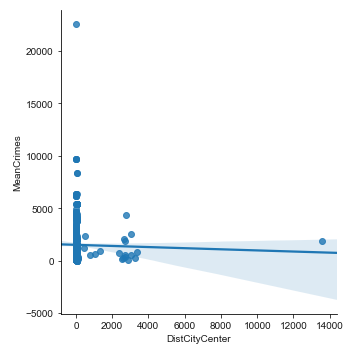

In [21]:
# Let's visual the mean crimes and distance to city center
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.lmplot(x="DistCityCenter",y="MeanCrimes", data=myMerge)
sns.set(style="whitegrid")
plt.style.use(u'ggplot')
plt.show()

In [22]:
# It's hard to visualise the above data
# Let' limit our analysis to 100 KM Radius for Melbourne
myMerge100 = myMerge[myMerge['DistCityCenter']<=100]
myMerge100.head()

,PostalCode,MeanCrimes,SuburbName,Latitude,Longitude,DistCityCenter,Schools,Parks,Stations,Restaurants
0,3760,4.4,Smiths Gully,-37.547874,145.269153,40.200979,0,0,0,0
1,3891,6.8,Koo Wee Rup North,-38.189865,145.470199,58.911076,1,1,0,0
2,3789,7.4,Sherbrooke,-37.657278,145.426561,43.616280,0,0,1,0
3,3785,10.0,Tremont,-37.779460,145.719412,65.213068,0,0,0,0
4,3920,10.4,HMAS Cerberus,-38.402340,144.965534,63.943175,0,0,0,0


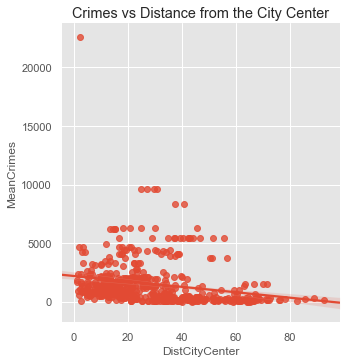

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.lmplot(x="DistCityCenter",y="MeanCrimes", data=myMerge100)
sns.set(style="whitegrid")
plt.style.use(u'ggplot')
plt.title("Crimes vs Distance from the City Center")
plt.show()

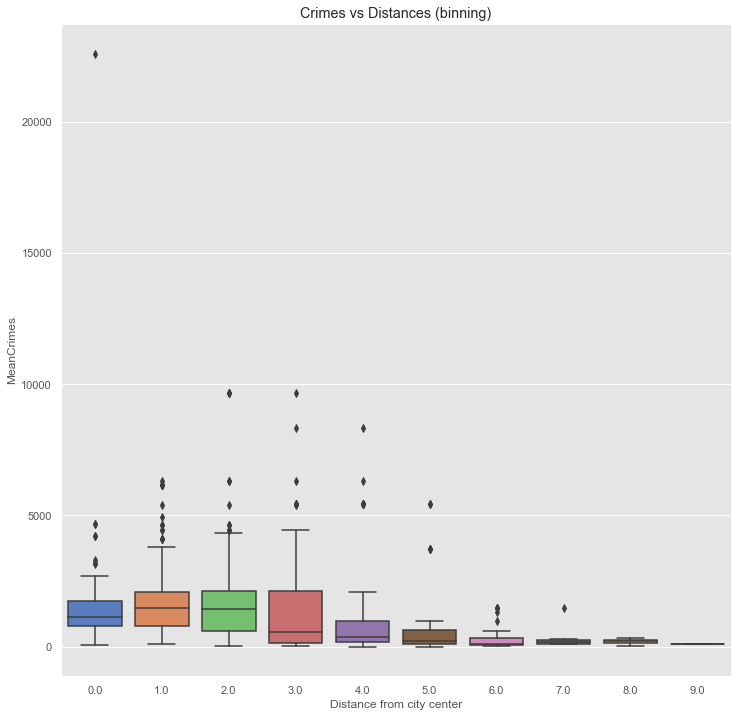

In [24]:
#Let's divide above graph in bins, such as each bin represents crimes with in 10KM range
def bin_distance(x):
    val = x//10
    return val

def generate_label(x):
    return "%d - %d Km"%(x*10,(x+1)*10)
        
tempdf= myMerge100.copy()
tempdf['Category']= tempdf['DistCityCenter'].apply(bin_distance)
tempdf['Labels']= tempdf['Category'].apply(generate_label)
plt.figure(figsize=(12,12))
ax = sns.boxplot(x="Category", y="MeanCrimes", data=tempdf, palette="muted")
plt.xlabel("Distance from city center")
plt.title("Crimes vs Distances (binning)")
plt.show()

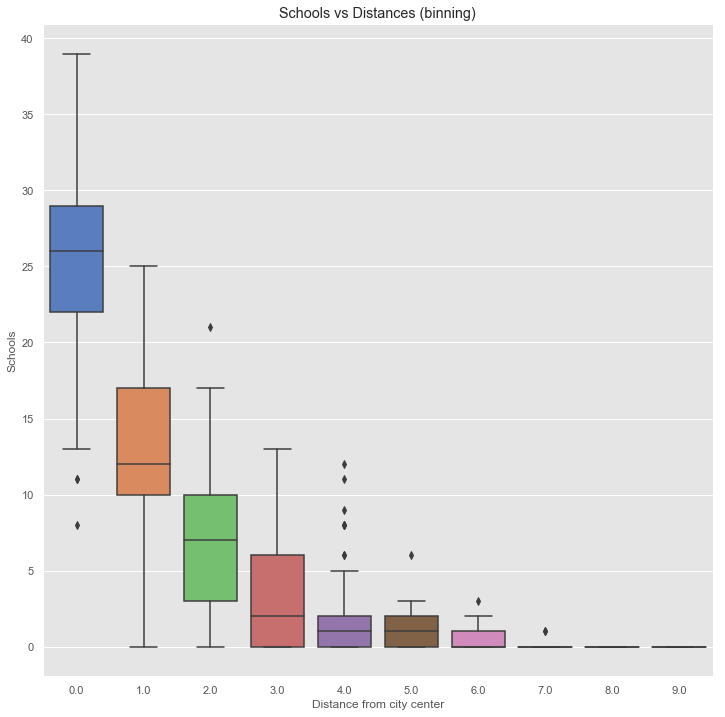

In [25]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x="Category", y="Schools", data=tempdf, palette="muted")
plt.xlabel("Distance from city center")
plt.title("Schools vs Distances (binning)")
plt.show()

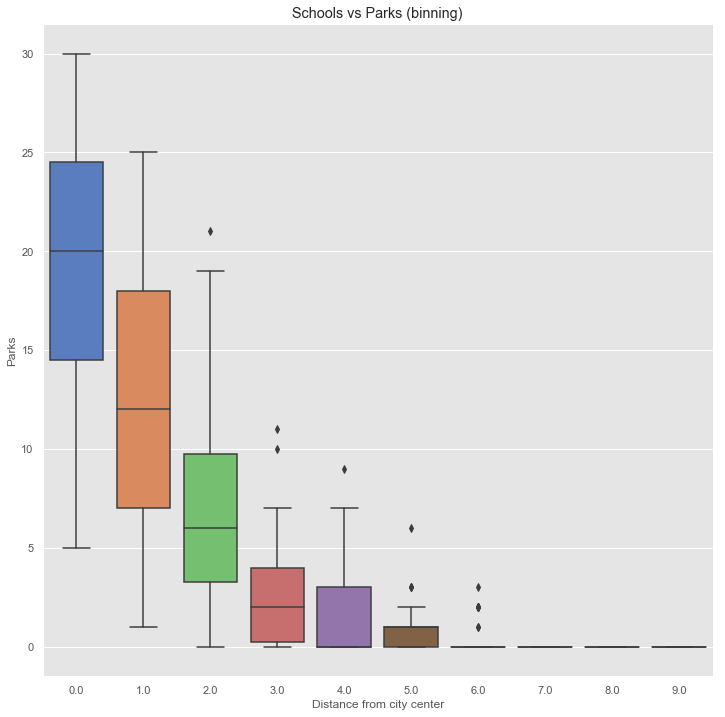

In [45]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x="Category", y="Parks", data=tempdf, palette="muted")
plt.xlabel("Distance from city center")
plt.title("Schools vs Parks (binning)")
plt.show()

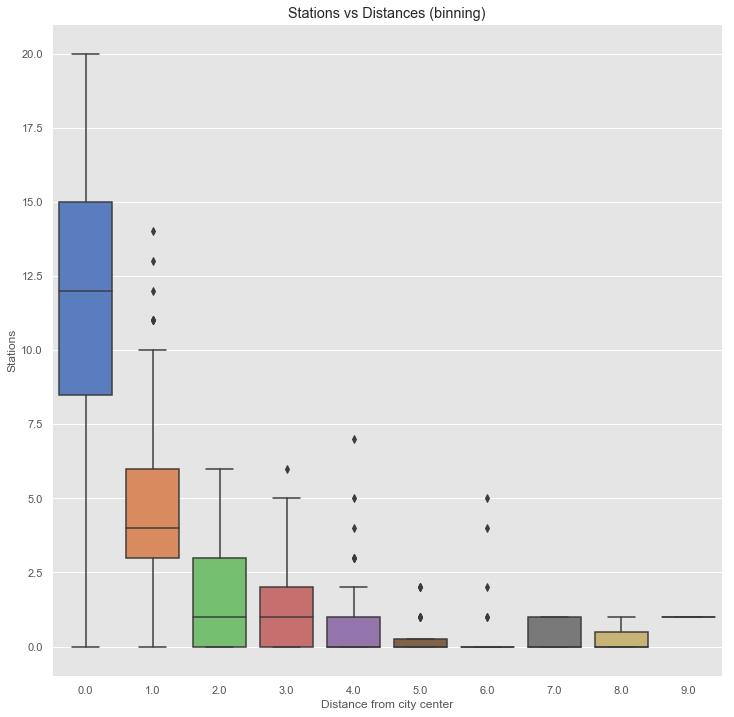

In [26]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x="Category", y="Stations", data=tempdf, palette="muted")
plt.xlabel("Distance from city center")
plt.title("Stations vs Distances (binning)")
plt.show()

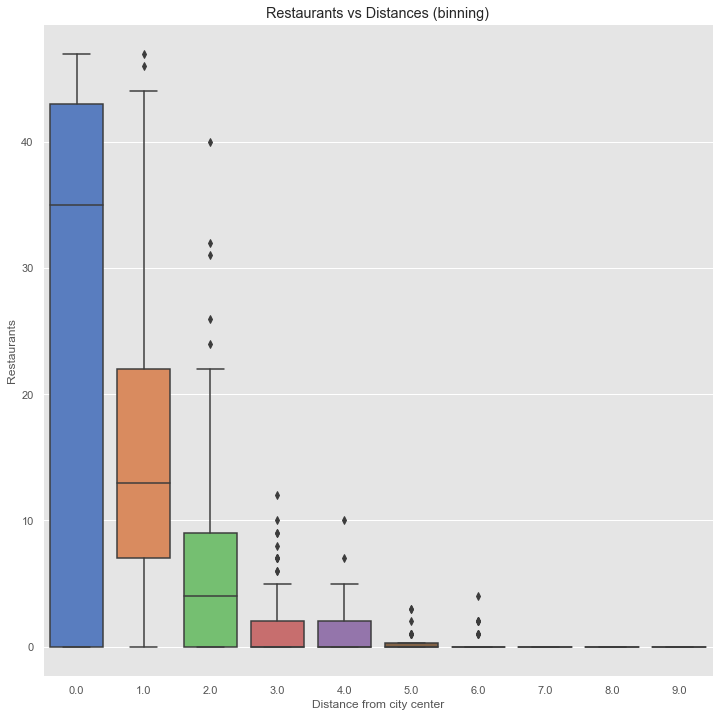

In [27]:
plt.figure(figsize=(12,12))
ax = sns.boxplot(x="Category", y="Restaurants", data=tempdf, palette="muted")
plt.xlabel("Distance from city center")
plt.title("Restaurants vs Distances (binning)")
plt.show()

Regarding crimes, the crime rate decreases as we move away from the cty.

For venues, the number decrease. It makes sense because far away suburbs has not many venues with in 3 KM. To test this hypothesie, we will search schools and restaruants with in 10 KM of each suburn and re-draw the box plot

In [35]:
# Setting up the Foursquare API
radius = 10000
CLIENT_ID = 'QUC1AD5AAIO4Y5Q54CBZQWVBQKLNLG1N5GLKMOH2SV4VKMPC' # your Foursquare ID
CLIENT_SECRET = 'AJWL0IN0XSFF440CYNK2CCQF1ZKLDDA15OUAHZ5VVOKB4XPD' # your Foursquare Secret
VERSION = '20190815'
LIMIT = 50
# Search schools with in 10 KM Radius
tempdf = search_school(tempdf)
tempdf = search_restaurant(tempdf)

0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69102c6e465000390c11fb'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69102c396de00039f34b99'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69102dbbed210032ebe2c4'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69102d2c2017003800fefd'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69102e86bc49002c24fe78'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69102f6f0aa200392482bb'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69102fcf72a00

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69105ac267e9003843c301'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69105bf1110b002bc5df20'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69105bf96b2c002c343b14'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69105cd9a6e6002cde3a0f'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69105ce0c0c900398135f6'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69105d6f0aa200392567f4'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69105ea87921002

{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69108ed69ed0002c2492ab'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69108fc58ed7002c1e958b'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d69108fe0c0c90039823157'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d691090d9a6e6002cdf397c'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d691090a19793002b5c04fd'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d691091d69ed0002c249f7d'}, 'response': {}}
0
{'meta': {'code': 429, 'errorType': 'quota_exceeded', 'errorDetail': 'Quota exceeded', 'requestId': '5d6910916e4650003

From cffi callback <function _verify_callback at 0x000001A3990CD1E0>:
Traceback (most recent call last):
  File "C:\Users\Nabeel Khan\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 221, in wrapper
    @wraps(callback)
KeyboardInterrupt


SSLError: HTTPSConnectionPool(host='api.foursquare.com', port=443): Max retries exceeded with url: /v2/venues/search?client_id=QUC1AD5AAIO4Y5Q54CBZQWVBQKLNLG1N5GLKMOH2SV4VKMPC&client_secret=AJWL0IN0XSFF440CYNK2CCQF1ZKLDDA15OUAHZ5VVOKB4XPD&ll=-38.049175,145.41180221332&v=20190815&query=School&radius=10000&limit=50 (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')],)",),))

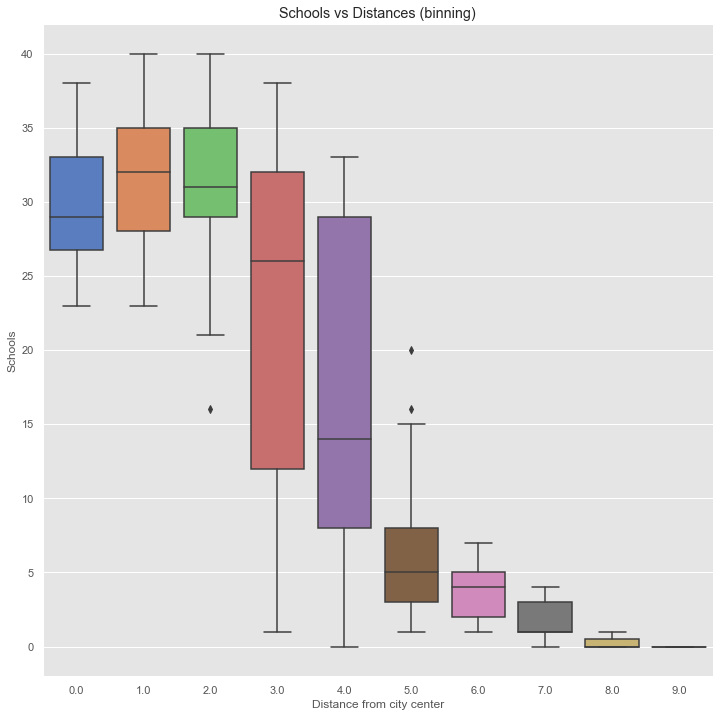

In [54]:
suburbMelbourneDfTemp['Category']= suburbMelbourneDfTemp['DistCityCenter'].apply(bin_distance)
suburbMelbourneDfTemp['Labels']= suburbMelbourneDfTemp['Category'].apply(generate_label)
suburbMelbourneDfTemp= suburbMelbourneDfTemp[suburbMelbourneDfTemp['DistCityCenter']<=100]
suburbMelbourneDfTemp.head(20)
plt.figure(figsize=(12,12))
ax = sns.boxplot(x="Category", y="Schools", data=suburbMelbourneDfTemp, palette="muted")
plt.xlabel("Distance from city center")
plt.title("Schools vs Distances (binning)")
plt.show()

In [75]:
# Finding number of resturants with in 10 Km for each suburb, which is with in 100 km from the city center
print(suburbMelbourneDfTemp[suburbMelbourneDfTemp['DistCityCenter']<=100].shape)


(526, 11)


In [77]:
# Searching the school information
search_query = 'Restaurant'

# Initialising column with zero values
suburbMelbourneDfTemp["Restaurants"]= 0

row_index=0
# Going through each suburb
for eachSubrub,eachLatitude, eachLongitude in zip(suburbMelbourneDfTemp["SuburbName"],suburbMelbourneDfTemp["Latitude"], suburbMelbourneDfTemp["Longitude"]):
  
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, eachLatitude, eachLongitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    
    # Extract the total number of outputs returned by query
    try:
        count = len(results['response']['venues'])
    except:
        continue
    output = list()
    # Extracting each venue information
    for i in range(0, count):
        try:
            restaurant_name= results['response']['venues'][i]['name']
            restaurant_category_name =results['response']['venues'][i]['categories'][0]['name']
        except:
            continue
       
        # Ignoring wrong outputs i.e., only accepting Parks and Playlands
        if restaurant_category_name.strip().find("Restaurant")>=0:
            output.append([restaurant_name, restaurant_category_name])
    print(output)
    suburbMelbourneDfTemp.iloc[row_index, suburbMelbourneDfTemp.columns.get_loc('Restaurants')]=len(output)
    row_index+=1
    break
suburbMelbourneDfTemp.head()

KeyboardInterrupt: 

<H2> Find the safest suburbs 40 - 70 km </H2> 

In [36]:
myMerge.head()


,PostalCode,MeanCrimes,SuburbName,Latitude,Longitude,DistCityCenter,Schools,Parks,Stations,Restaurants
0,3760,4.4,Smiths Gully,-37.547874,145.269153,40.200979,0,0,0,0
1,3891,6.8,Koo Wee Rup North,-38.189865,145.470199,58.911076,1,1,0,0
2,3789,7.4,Sherbrooke,-37.657278,145.426561,43.616280,0,0,1,0
3,3785,10.0,Tremont,-37.779460,145.719412,65.213068,0,0,0,0
4,3920,10.4,HMAS Cerberus,-38.402340,144.965534,63.943175,0,0,0,0


In [37]:
# Extract all data from 40-60 KM in range
mySafeDf =myMerge[(myMerge['DistCityCenter']>=40) & (myMerge['DistCityCenter']<=100)]

In [38]:
mySafeDf.shape

(138, 10)

In [39]:
mySortedDf = mySafeDf.sort_values(by=['MeanCrimes'], ascending=True)
mySortedDf.head(5)

,PostalCode,MeanCrimes,SuburbName,Latitude,Longitude,DistCityCenter,Schools,Parks,Stations,Restaurants
0,3760,4.4,Smiths Gully,-37.547874,145.269153,40.200979,0,0,0,0
1,3891,6.8,Koo Wee Rup North,-38.189865,145.470199,58.911076,1,1,0,0
2,3789,7.4,Sherbrooke,-37.657278,145.426561,43.616280,0,0,1,0
3,3785,10.0,Tremont,-37.779460,145.719412,65.213068,0,0,0,0
4,3920,10.4,HMAS Cerberus,-38.402340,144.965534,63.943175,0,0,0,0


In [46]:
# Identifying worse suburbs
myWorseSuburbs = mySortedDf.tail()
myWorseSuburbs=myWorseSuburbs.sort_values(by=['MeanCrimes'], ascending= False)
#myWorseSuburbs.drop(['PostalCode','Latitude','Longitude','Schools','Parks','Stations','Restaurants'], axis=1, inplace= True)
myWorseSuburbs.reset_index(inplace= True, drop=True)
myWorseSuburbs.head()

,PostalCode,MeanCrimes,SuburbName,Latitude,Longitude,DistCityCenter,Schools,Parks,Stations,Restaurants
0,3199,8345.6,Frankston South,-38.176503,145.129564,40.969738,11,7,2,2
1,3030,6321.0,Cocoroc,-37.939081,144.478941,45.689837,0,0,1,0
2,3977,5420.2,Tooradin North,-38.213830,145.381683,55.547626,0,1,0,1
3,3977,5420.2,Cranbourne,-38.099838,145.282938,40.292916,12,4,3,3
4,3977,5420.2,Devon Meadows,-38.162018,145.302493,46.729657,0,0,0,0


In [47]:
# Identifying worse suburbs
myBestSuburbs = mySortedDf.head(5).copy()
#myBestSuburbs.drop(['PostalCode','Latitude','Longitude','Schools','Parks','Stations','Restaurants'], axis=1, inplace= True)
myBestSuburbs.reset_index(inplace= True, drop=True)
myBestSuburbs.head()

,PostalCode,MeanCrimes,SuburbName,Latitude,Longitude,DistCityCenter,Schools,Parks,Stations,Restaurants
0,3760,4.4,Smiths Gully,-37.547874,145.269153,40.200979,0,0,0,0
1,3891,6.8,Koo Wee Rup North,-38.189865,145.470199,58.911076,1,1,0,0
2,3789,7.4,Sherbrooke,-37.657278,145.426561,43.616280,0,0,1,0
3,3785,10.0,Tremont,-37.779460,145.719412,65.213068,0,0,0,0
4,3920,10.4,HMAS Cerberus,-38.402340,144.965534,63.943175,0,0,0,0


In [48]:
# Saving suburbs on a CSV
myWorseSuburbs.to_csv("worse_suburbs.csv", index= False)
myBestSuburbs.to_csv("best_suburbs.csv", index= False)

<H2> Time to find potential venue types in each suburb now </H2>

In [1]:
# Setting up the Foursquare API
radius = 10000
CLIENT_ID = 'GHAF50FYPZ2B5IXEGKEIWLSWSXLZDQOQ15U34SMFD2DMLVY0' # your Foursquare ID
CLIENT_SECRET = 'VAJIFHATMH0QX4BWTWNGWONSZGLE2AZKN3V3YHMCNHYZRRIX' # your Foursquare Secret
VERSION = '20190815'
LIMIT = 200

In [2]:
import pandas as pd
myBestSuburbs= pd.read_csv('best_suburbs.csv')
myBestSuburbs.head()

,PostalCode,MeanCrimes,SuburbName,Latitude,Longitude,DistCityCenter,Schools,Parks,Stations,Restaurants
0,3760,4.4,Smiths Gully,-37.547874,145.269153,40.200979,0,0,0,0
1,3891,6.8,Koo Wee Rup North,-38.189865,145.470199,58.911076,1,1,0,0
2,3789,7.4,Sherbrooke,-37.657278,145.426561,43.616280,0,0,1,0
3,3785,10.0,Tremont,-37.779460,145.719412,65.213068,0,0,0,0
4,3920,10.4,HMAS Cerberus,-38.402340,144.965534,63.943175,0,0,0,0


In [138]:
myWorseSuburbs= pd.read_csv('worse_suburbs.csv')
myWorseSuburbs.head()

,PostalCode,MeanCrimes,SuburbName,Latitude,Longitude,DistCityCenter,Schools,Parks,Stations,Restaurants
0,3199,8345.6,Frankston South,-38.176503,145.129564,40.969738,11,7,2,2
1,3030,6321.0,Cocoroc,-37.939081,144.478941,45.689837,0,0,1,0
2,3977,5420.2,Tooradin North,-38.213830,145.381683,55.547626,0,1,0,1
3,3977,5420.2,Cranbourne,-38.099838,145.282938,40.292916,12,4,3,3
4,3977,5420.2,Devon Meadows,-38.162018,145.302493,46.729657,0,0,0,0


In [3]:
# Dropping columns to populate them again
myBestSuburbs.drop(['Schools','Parks','Stations','Restaurants'], axis=1, inplace= True)
myBestSuburbs.head()


,PostalCode,MeanCrimes,SuburbName,Latitude,Longitude,DistCityCenter
0,3760,4.4,Smiths Gully,-37.547874,145.269153,40.200979
1,3891,6.8,Koo Wee Rup North,-38.189865,145.470199,58.911076
2,3789,7.4,Sherbrooke,-37.657278,145.426561,43.616280
3,3785,10.0,Tremont,-37.779460,145.719412,65.213068
4,3920,10.4,HMAS Cerberus,-38.402340,144.965534,63.943175


In [9]:
# Finding all potential schools, parks etc for best Suburbs
# Search Schools
myBestSuburbs = search_school(myBestSuburbs)
myBestSuburbs.head()


0


,PostalCode,MeanCrimes,SuburbName,Latitude,Longitude,DistCityCenter,Schools
0,3760,4.4,Smiths Gully,-37.547874,145.269153,40.200979,1
1,3891,6.8,Koo Wee Rup North,-38.189865,145.470199,58.911076,2
2,3789,7.4,Sherbrooke,-37.657278,145.426561,43.616280,6
3,3785,10.0,Tremont,-37.779460,145.719412,65.213068,2
4,3920,10.4,HMAS Cerberus,-38.402340,144.965534,63.943175,7


In [10]:
#Search Parks
myBestSuburbs = search_park(myBestSuburbs)
myBestSuburbs.head()


,PostalCode,MeanCrimes,SuburbName,Latitude,Longitude,DistCityCenter,Schools,Parks
0,3760,4.4,Smiths Gully,-37.547874,145.269153,40.200979,1,7
1,3891,6.8,Koo Wee Rup North,-38.189865,145.470199,58.911076,2,4
2,3789,7.4,Sherbrooke,-37.657278,145.426561,43.616280,6,5
3,3785,10.0,Tremont,-37.779460,145.719412,65.213068,2,2
4,3920,10.4,HMAS Cerberus,-38.402340,144.965534,63.943175,7,6


In [11]:
# Search Stations
myBestSuburbs = search_station(myBestSuburbs)
myBestSuburbs.head()


,PostalCode,MeanCrimes,SuburbName,Latitude,Longitude,DistCityCenter,Schools,Parks,Stations
0,3760,4.4,Smiths Gully,-37.547874,145.269153,40.200979,1,7,1
1,3891,6.8,Koo Wee Rup North,-38.189865,145.470199,58.911076,2,4,0
2,3789,7.4,Sherbrooke,-37.657278,145.426561,43.616280,6,5,2
3,3785,10.0,Tremont,-37.779460,145.719412,65.213068,2,2,1
4,3920,10.4,HMAS Cerberus,-38.402340,144.965534,63.943175,7,6,0


In [12]:
# Search Restaurants
myBestSuburbs = search_restaurant(myBestSuburbs)
myBestSuburbs.head()

,PostalCode,MeanCrimes,SuburbName,Latitude,Longitude,DistCityCenter,Schools,Parks,Stations,Restaurants
0,3760,4.4,Smiths Gully,-37.547874,145.269153,40.200979,1,7,1,0
1,3891,6.8,Koo Wee Rup North,-38.189865,145.470199,58.911076,2,4,0,2
2,3789,7.4,Sherbrooke,-37.657278,145.426561,43.616280,6,5,2,8
3,3785,10.0,Tremont,-37.779460,145.719412,65.213068,2,2,1,1
4,3920,10.4,HMAS Cerberus,-38.402340,144.965534,63.943175,7,6,0,7


In [28]:
newDf[['Schools','Parks','Stations','Restaurants']].max().max()

8

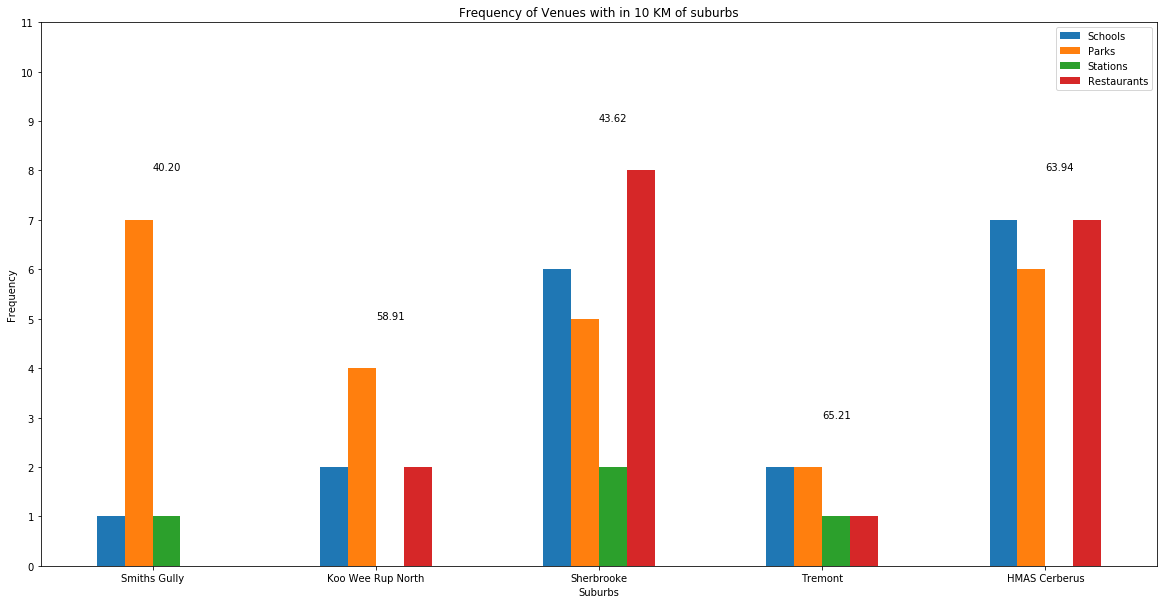

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Customise the data frame to just keep Name and venues information
newDf = myBestSuburbs.copy()
newDf.drop(['PostalCode','MeanCrimes','Latitude','Longitude'],axis=1, inplace= True)
ax=newDf.plot.bar(x='SuburbName',y=['Schools','Parks','Stations','Restaurants'], rot=0,figsize=(20,10))
for i, label in enumerate(list(newDf.index)):
    score = float(newDf.iloc[label]['DistCityCenter'])
    max_val = newDf.iloc[label][['Schools','Parks','Stations','Restaurants']].max().max()
    ax.annotate("%0.2f"%score, (i,max_val+1))
plt.title("Frequency of Venues with in 10 KM of suburbs")
plt.xlabel('Suburbs')
plt.ylabel('Frequency')
plt.yticks(np.arange(0,12,1))
plt.show()

In [48]:
# Search Restaurants
newDf['Total']= newDf[['Schools','Parks','Stations','Restaurants']].sum(axis=1)

In [49]:
newDf.head()

,SuburbName,DistCityCenter,Schools,Parks,Stations,Restaurants,Total
0,Smiths Gully,40.200979,1,7,1,0,9
1,Koo Wee Rup North,58.911076,2,4,0,2,8
2,Sherbrooke,43.616280,6,5,2,8,21
3,Tremont,65.213068,2,2,1,1,6
4,HMAS Cerberus,63.943175,7,6,0,7,20


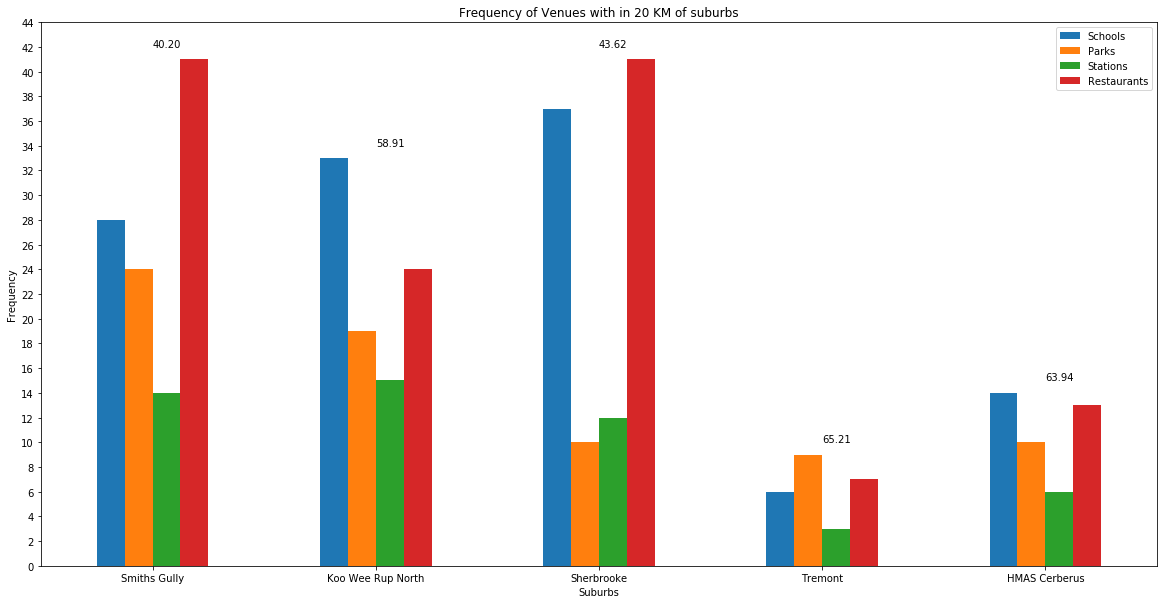

In [54]:
%matplotlib inline

# Now checking with in radius of 20 KM
radius =20000
#myBestSuburbs20Km= pd.read_csv('best_suburbs.csv')
#myBestSuburbs20Km.drop(['Schools','Parks','Stations','Restaurants'], axis=1, inplace= True)
#myBestSuburbs20Km = search_school(myBestSuburbs20Km)
#myBestSuburbs20Km = search_park(myBestSuburbs20Km)
#myBestSuburbs20Km = search_station(myBestSuburbs20Km)
#myBestSuburbs20Km = search_restaurant(myBestSuburbs20Km)

%matplotlib inline
# Customise the data frame to just keep Name and venues information
newDf20Km = myBestSuburbs20Km.copy()
newDf20Km.drop(['PostalCode','MeanCrimes','Latitude','Longitude'],axis=1, inplace= True)
ax=newDf20Km.plot.bar(x='SuburbName',y=['Schools','Parks','Stations','Restaurants'], rot=0,figsize=(20,10))
for i, label in enumerate(list(newDf20Km.index)):
    score = float(newDf20Km.iloc[label]['DistCityCenter'])
    max_val = newDf20Km.iloc[label][['Schools','Parks','Stations','Restaurants']].max().max()
    ax.annotate("%0.2f"%score, (i,max_val+1))
plt.title("Frequency of Venues with in 20 KM of suburbs")
plt.xlabel('Suburbs')
plt.ylabel('Frequency')
plt.yticks(np.arange(0,newDf20Km[['Schools','Parks','Stations','Restaurants']].max().max()+5,2))
plt.show()

In [55]:
newDf20Km.head()

,SuburbName,DistCityCenter,Schools,Parks,Stations,Restaurants
0,Smiths Gully,40.200979,28,24,14,41
1,Koo Wee Rup North,58.911076,33,19,15,24
2,Sherbrooke,43.616280,37,10,12,41
3,Tremont,65.213068,6,9,3,7
4,HMAS Cerberus,63.943175,14,10,6,13


In [154]:
newDf20Km['Total']= newDf20Km[['Schools','Parks','Stations','Restaurants']].sum(axis=1)

In [155]:
newDf20Km.head()

,SuburbName,DistCityCenter,Schools,Parks,Stations,Restaurants,Total
0,Smiths Gully,40.200979,28,22,11,41,102
1,Koo Wee Rup North,58.911076,34,20,14,24,92
2,Sherbrooke,43.616280,39,9,11,41,100
3,Tremont,65.213068,6,9,3,7,25
4,HMAS Cerberus,63.943175,14,11,6,13,44


<H1> Now finding near by venues for The best suburb i.e. Sherbrooke </H1>

#### Now, let's get the top 100 venues that are in top 3 suburbs within a radius of 500 meters.

In [144]:
# Lets explore the data with in 10 KM of our best suburb 
LIMIT =100
radius =1000
CLIENT_ID = 'GHAF50FYPZ2B5IXEGKEIWLSWSXLZDQOQ15U34SMFD2DMLVY0' # your Foursquare ID
CLIENT_SECRET = 'VAJIFHATMH0QX4BWTWNGWONSZGLE2AZKN3V3YHMCNHYZRRIX' # your Foursquare Secret
VERSION = '20190815'

bestSuburb = myBestSuburbs.copy()
#bestSuburb.drop([3,4], inplace= True)
bestSuburb.head()

,PostalCode,MeanCrimes,SuburbName,Latitude,Longitude,DistCityCenter,Schools,Parks,Stations,Restaurants
0,3760,4.4,Smiths Gully,-37.547874,145.269153,40.200979,1,7,1,0
1,3891,6.8,Koo Wee Rup North,-38.189865,145.470199,58.911076,2,4,0,2
2,3789,7.4,Sherbrooke,-37.657278,145.426561,43.616280,6,5,2,8
3,3785,10.0,Tremont,-37.779460,145.719412,65.213068,2,2,1,1
4,3920,10.4,HMAS Cerberus,-38.402340,144.965534,63.943175,7,6,0,7


In [145]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [146]:
def getNearbyVenues(names, latitudes, longitudes, radius=10000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['SuburbName', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [147]:
# type your answer here
melbourne_suburb_venues = getNearbyVenues(names=bestSuburb['SuburbName'],
                                   latitudes=bestSuburb['Latitude'],
                                   longitudes=bestSuburb['Longitude']
                                  )



Smiths Gully
Koo Wee Rup North
Sherbrooke
Tremont
HMAS Cerberus


In [148]:
melbourne_suburb_venues.head()

,SuburbName,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Smiths Gully,-37.547874,145.269153,Flying Tarts,-37.481188,145.277413,Bakery
1,Smiths Gully,-37.547874,145.269153,A Boy Named Sue,-37.605030,145.266790,Pizza Place
2,Smiths Gully,-37.547874,145.269153,St Andrews Market,-37.604995,145.267289,Flea Market
3,Smiths Gully,-37.547874,145.269153,Smiths Gully General Store,-37.620483,145.262690,Grocery Store
4,Smiths Gully,-37.547874,145.269153,Mason Falls,-37.493320,145.250493,Trail


In [149]:
#Let's check how many venues were returned for each suburb
melbourne_suburb_venues.groupby('SuburbName').count()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
SuburbName,,,,,,
HMAS Cerberus,79,79,79,79,79,79
Koo Wee Rup North,15,15,15,15,15,15
Sherbrooke,63,63,63,63,63,63
Smiths Gully,10,10,10,10,10,10
Tremont,12,12,12,12,12,12


#### Let's find out how many unique categories can be curated from all the returned venues

In [150]:
print('There are {} uniques categories.'.format(len(melb_suburb_venues['Venue Category'].unique())))

There are 62 uniques categories.


## 3. Analyze Each Neighborhood

In [151]:
# one hot encoding
melbourne_onehot = pd.get_dummies(melbourne_suburb_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
melbourne_onehot['SuburbName'] = melbourne_suburb_venues['SuburbName'] 

# move neighborhood column to the first column
fixed_columns = [melbourne_onehot.columns[-1]] + list(melbourne_onehot.columns[:-1])
melbourne_onehot = melbourne_onehot[fixed_columns]

melbourne_onehot.head()

,SuburbName,Airport,Antique Shop,Art Gallery,Australian Restaurant,Bakery,Bar,Beach,Big Box Store,Bistro,...,Shopping Mall,Supermarket,Tapas Restaurant,Theater,Track,Trail,Vineyard,Wine Shop,Winery,Zoo
0,Smiths Gully,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Smiths Gully,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Smiths Gully,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Smiths Gully,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Smiths Gully,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Next, let's group rows by suburb and by taking the mean of the frequency of occurrence of each category

In [152]:
melbourne_grouped = melbourne_onehot.groupby('SuburbName').mean().reset_index()
melbourne_grouped

,SuburbName,Airport,Antique Shop,Art Gallery,Australian Restaurant,Bakery,Bar,Beach,Big Box Store,Bistro,...,Shopping Mall,Supermarket,Tapas Restaurant,Theater,Track,Trail,Vineyard,Wine Shop,Winery,Zoo
0,HMAS Cerberus,0.000000,0.012658,0.000000,0.037975,0.037975,0.000000,0.075949,0.012658,0.012658,...,0.012658,0.012658,0.012658,0.000000,0.000000,0.0,0.012658,0.000000,0.037975,0.000000
1,Koo Wee Rup North,0.066667,0.000000,0.000000,0.066667,0.133333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,Sherbrooke,0.015873,0.000000,0.015873,0.031746,0.031746,0.015873,0.000000,0.000000,0.000000,...,0.000000,0.015873,0.000000,0.015873,0.015873,0.0,0.142857,0.015873,0.126984,0.015873
3,Smiths Gully,0.000000,0.000000,0.000000,0.100000,0.200000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000
4,Tremont,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.083333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


#### Let's print each suburb along with the top 5 most common venues

In [164]:
num_top_venues = 5
for hood in melbourne_grouped['SuburbName']:
    print("----"+hood+"----")
    temp = melbourne_grouped[melbourne_grouped['SuburbName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
  

----HMAS Cerberus----
           venue  freq
0           Café  0.11
1          Beach  0.08
2  Grocery Store  0.06
3           Farm  0.04
4          Hotel  0.04


----Koo Wee Rup North----
           venue  freq
0         Bakery  0.13
1           Farm  0.13
2        Airport  0.07
3    Supermarket  0.07
4  Grocery Store  0.07


----Sherbrooke----
        venue  freq
0    Vineyard  0.14
1      Winery  0.13
2        Café  0.10
3  Restaurant  0.06
4     Exhibit  0.03


----Smiths Gully----
                   venue  freq
0                 Bakery   0.2
1          Grocery Store   0.2
2            Pizza Place   0.1
3  Australian Restaurant   0.1
4            Flea Market   0.1


----Tremont----
           venue  freq
0           Café  0.33
1     Restaurant  0.08
2  Grocery Store  0.08
3         Bakery  0.08
4           Park  0.08




Now let's create the new dataframe and display the top 5 venues for each suburb.

In [167]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['SuburbName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['SuburbName'] = melbourne_grouped['SuburbName']

for ind in np.arange(melbourne_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(melbourne_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,SuburbName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,HMAS Cerberus,Café,Beach,Grocery Store,Scenic Lookout,Garden
1,Koo Wee Rup North,Farm,Bakery,Airport,Seafood Restaurant,Fish & Chips Shop
2,Sherbrooke,Vineyard,Winery,Café,Restaurant,Cheese Shop
3,Smiths Gully,Bakery,Grocery Store,Flea Market,Café,Pub
4,Tremont,Café,Park,Supermarket,Italian Restaurant,Restaurant


In [169]:
melbourne_merged = bestSuburb.copy()

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
melbourne_merged = melbourne_merged.join(neighborhoods_venues_sorted.set_index('SuburbName'), on='SuburbName')
melbourne_merged.drop(['PostalCode','MeanCrimes','Schools','Parks','Stations','Restaurants'], axis=1 , inplace= True)
melbourne_merged.head() # check the last columns!

,SuburbName,Latitude,Longitude,DistCityCenter,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Smiths Gully,-37.547874,145.269153,40.200979,Bakery,Grocery Store,Flea Market,Café,Pub
1,Koo Wee Rup North,-38.189865,145.470199,58.911076,Farm,Bakery,Airport,Seafood Restaurant,Fish & Chips Shop
2,Sherbrooke,-37.657278,145.426561,43.616280,Vineyard,Winery,Café,Restaurant,Cheese Shop
3,Tremont,-37.779460,145.719412,65.213068,Café,Park,Supermarket,Italian Restaurant,Restaurant
4,HMAS Cerberus,-38.402340,144.965534,63.943175,Café,Beach,Grocery Store,Scenic Lookout,Garden


In [202]:
import pandas as pd
myWorseSuburbs= pd.read_csv('worse_suburbs.csv')
myWorseSuburbs.head()

,PostalCode,MeanCrimes,SuburbName,Latitude,Longitude,DistCityCenter,Schools,Parks,Stations,Restaurants
0,3199,8345.6,Frankston South,-38.176503,145.129564,40.969738,11,7,2,2
1,3030,6321.0,Cocoroc,-37.939081,144.478941,45.689837,0,0,1,0
2,3977,5420.2,Tooradin North,-38.213830,145.381683,55.547626,0,1,0,1
3,3977,5420.2,Cranbourne,-38.099838,145.282938,40.292916,12,4,3,3
4,3977,5420.2,Devon Meadows,-38.162018,145.302493,46.729657,0,0,0,0


<h1> Finally, let's visualize the suburbs and corresponding top venues </h1>

In [208]:
from  geopy.geocoders import Nominatim

# Getting Melbourne CBD coordinates
geolocator = Nominatim(user_agent="explorer")
loc = geolocator.geocode('Melbourne City Center, Melbourne, Australia', timeout=100)
latitude =loc.latitude
longitude =loc.longitude

In [241]:
melb_suburb_venues.head()

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Smiths Gully,-37.547874,145.269153,Flying Tarts,-37.481188,145.277413,Bakery
1,Smiths Gully,-37.547874,145.269153,A Boy Named Sue,-37.605030,145.266790,Pizza Place
2,Smiths Gully,-37.547874,145.269153,St Andrews Market,-37.604995,145.267289,Flea Market
3,Smiths Gully,-37.547874,145.269153,Smiths Gully General Store,-37.620483,145.262690,Grocery Store
4,Smiths Gully,-37.547874,145.269153,Mason Falls,-37.493320,145.250493,Trail


In [242]:
melbourne_merged.head()

,SuburbName,Latitude,Longitude,DistCityCenter,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Smiths Gully,-37.547874,145.269153,40.200979,Bakery,Grocery Store,Flea Market,Café,Pub
1,Koo Wee Rup North,-38.189865,145.470199,58.911076,Farm,Bakery,Airport,Seafood Restaurant,Fish & Chips Shop
2,Sherbrooke,-37.657278,145.426561,43.616280,Vineyard,Winery,Café,Restaurant,Cheese Shop
3,Tremont,-37.779460,145.719412,65.213068,Café,Park,Supermarket,Italian Restaurant,Restaurant
4,HMAS Cerberus,-38.402340,144.965534,63.943175,Café,Beach,Grocery Store,Scenic Lookout,Garden


In [352]:
import collections
from collections import namedtuple

def get_bearing(p1, p2):
    
    '''
    Returns compass bearing from p1 to p2
    
    Parameters
    p1 : namedtuple with lat lon
    p2 : namedtuple with lat lon
    
    Return
    compass bearing of type float
    
    Notes
    Based on https://gist.github.com/jeromer/2005586
    '''
    
    long_diff = np.radians(p2.lon - p1.lon)
    
    lat1 = np.radians(p1.lat)
    lat2 = np.radians(p2.lat)
    
    x = np.sin(long_diff) * np.cos(lat2)
    y = (np.cos(lat1) * np.sin(lat2) 
        - (np.sin(lat1) * np.cos(lat2) 
        * np.cos(long_diff)))
    bearing = np.degrees(np.arctan2(x, y))
    
    # adjusting for compass bearing
    if bearing < 0:
        return bearing + 360
    return bearing

def get_arrows(locations, color='green', size=10, n_arrows=1):
    
    '''
    Get a list of correctly placed and rotated 
    arrows/markers to be plotted
    
    Parameters
    locations : list of lists of lat lons that represent the 
                start and end of the line. 
                eg [[41.1132, -96.1993],[41.3810, -95.8021]]
    arrow_color : default is 'blue'
    size : default is 6
    n_arrows : number of arrows to create.  default is 3
    Return
    list of arrows/markers
    '''
    
    Point = namedtuple('Point', field_names=['lat', 'lon'])
    
    # creating point from our Point named tuple
    p1 = Point(locations[0][0], locations[0][1])
    p2 = Point(locations[1][0], locations[1][1])
    
    # getting the rotation needed for our marker.  
    # Subtracting 90 to account for the marker's orientation
    # of due East(get_bearing returns North)
    rotation = get_bearing(p1, p2) - 90
    
    # get an evenly space list of lats and lons for our arrows
    # note that I'm discarding the first and last for aesthetics
    # as I'm using markers to denote the start and end
    arrow_lats = np.linspace(p1.lat, p2.lat, n_arrows + 2)[1:n_arrows+1]
    arrow_lons = np.linspace(p1.lon, p2.lon, n_arrows + 2)[1:n_arrows+1]
    
    arrows = []
    
    #creating each "arrow" and appending them to our arrows list
    for points in zip(arrow_lats, arrow_lons):
        arrows.append(folium.RegularPolygonMarker(location=points, 
                      fill_color='green',fill=True, fill_opacity=0.7,color='green',number_of_sides=3, 
                      radius=size, rotation=rotation))
    return arrows



In [353]:
# Extract latitude and longitude for top venues
def get_suburb_top_venues_latitude_longitude(suburb_name):
    locations =list()
    for j in range(4,9):
        df= melb_suburb_venues[melb_suburb_venues['Suburb']== suburb_name]
        common_venue = melbourne_merged[melbourne_merged['SuburbName']== suburb_name]
        venue_latitude =  df[df['Venue Category']== common_venue.iloc[0][j]]['Venue Latitude']
        venue_longitude = df[df['Venue Category']== common_venue.iloc[0][j]]['Venue Longitude']
        venue_name = df[df['Venue Category']== common_venue.iloc[0][j]]['Venue Category']
        for lat, lon, venue in zip(venue_latitude, venue_longitude,venue_name):
            locations.append([venue_name,lat,lon])
    return locations

In [359]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors


# create map
map = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(10)
ys = [i + x + (i*x)**2 for i in range(10)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
i=0
for lat, lon, poi, dist in zip(melbourne_merged['Latitude'], melbourne_merged['Longitude'], melbourne_merged['SuburbName'], melbourne_merged['DistCityCenter']):
    label = folium.Popup(str(poi), parse_html=True,fill_color=rainbow[i])
    folium.Marker( location=[lat, lon], popup='%s [Distance from CBD=%0.3f]'%(poi,dist),
                  color=rainbow[7], fill=True, 
                  fill_color=rainbow[7],fill_opacity=0.7).add_to(map)
    locations =get_suburb_top_venues_latitude_longitude(poi)
    for loc in locations:
        lat_v =loc[1]
        long_v= loc[2]
        folium.CircleMarker(
            [lat_v, long_v],
            radius=2,
            popup=loc[0],
            color=rainbow[i],
            fill=True,
            fill_color=rainbow[i],
            fill_opacity=0.7).add_to(map)
    i+=1
    
    p1= [latitude, longitude]
    p2= [lat, lon]
    folium.PolyLine(locations=[p1,p2 ], color='green').add_to(map)
    arrows = get_arrows(locations=[p1, p2], n_arrows=1)
    for arrow in arrows:
        arrow.add_to(map)

    # Displaying Worse Suburbs
    for lat, lon, poi in zip(myWorseSuburbs['Latitude'], myWorseSuburbs['Longitude'], myWorseSuburbs['SuburbName']):
        label = folium.Popup(str(poi), parse_html=True)
      
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color='yellow',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.7).add_to(map)

    
map

<H2> Clustering the suburb locations </H2> 

In [529]:
suburbMelbourneDf.head()

,SuburbName,PostalCode,Latitude,Longitude,DistCityCenter
0,Bellfield,3081,-37.753107,145.038478,9.753178
1,Briar Hill,3088,-37.706370,145.121648,18.360736
2,Bundoora,3083,-37.697306,145.066254,16.358531
3,Eaglemont,3084,-37.765144,145.063331,10.100375
4,Eltham,3095,-37.717870,145.156690,19.762348


In [540]:
MelbourneCrimeStatsDf.head()
crimeStats = MelbourneCrimeStatsDf[['PostalCode','MeanCrimes']]
mergeCrimeRate= suburbMelbourneDf.merge(crimeStats, how='inner', on=['PostalCode'])

# We pick only those suburbs for which there is at-least 50 crimes per year
mergeCrimeRate=mergeCrimeRate[mergeCrimeRate['MeanCrimes']>50]
mergeCrimeRate=mergeCrimeRate[mergeCrimeRate['DistCityCenter']<150]
mergeCrimeRate.head()

,SuburbName,PostalCode,Latitude,Longitude,DistCityCenter,MeanCrimes
0,Bellfield,3081,-37.753107,145.038478,9.753178,1741.8
1,Heidelberg Heights,3081,-37.745183,145.052919,11.188990,1741.8
2,Heidelberg West,3081,-37.738243,145.043392,11.396561,1741.8
3,Briar Hill,3088,-37.706370,145.121648,18.360736,1690.0
4,Greensborough,3088,-37.698847,145.107400,18.185739,1690.0


In [541]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
crimesRateClustering = mergeCrimeRate.drop(['SuburbName','PostalCode','Latitude','Longitude','MeanCrimes'], 1)
crimesRateClustering.head()

,DistCityCenter
0,9.753178
1,11.188990
2,11.396561
3,18.360736
4,18.185739


In [542]:
# set number of clusters
kclusters = 20


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(crimesRateClustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([ 2, 12, 12, 19, 19, 19,  5, 12,  2, 12])

In [543]:
mergeCrimeRate.insert(5, 'Cluster Labels', kmeans.labels_)

In [544]:
    
mergeCrimeRate.head()

,SuburbName,PostalCode,Latitude,Longitude,DistCityCenter,Cluster Labels,MeanCrimes
0,Bellfield,3081,-37.753107,145.038478,9.753178,2,1741.8
1,Heidelberg Heights,3081,-37.745183,145.052919,11.188990,12,1741.8
2,Heidelberg West,3081,-37.738243,145.043392,11.396561,12,1741.8
3,Briar Hill,3088,-37.706370,145.121648,18.360736,19,1690.0
4,Greensborough,3088,-37.698847,145.107400,18.185739,19,1690.0


In [545]:
import math

def find_mean_loc(coords_df):
    x = 0.0
    y = 0.0
    z = 0.0

    for i, coord in coords_df.iterrows():
        latitude = math.radians(coord.Latitude)
        longitude = math.radians(coord.Longitude)

        x += math.cos(latitude) * math.cos(longitude)
        y += math.cos(latitude) * math.sin(longitude)
        z += math.sin(latitude)

    total = len(coords_df)

    x = x / total
    y = y / total
    z = z / total

    central_longitude = math.atan2(y, x)
    central_square_root = math.sqrt(x * x + y * y)
    central_latitude = math.atan2(z, central_square_root)
    
    return math.degrees(central_latitude),math.degrees(central_longitude)

total_crimes_melbourne =mergeCrimeRate['MeanCrimes'].sum()
map_output =list() 
# Find mean latitude and longitude
for i in range(0,kclusters):
    coordDf =mergeCrimeRate[mergeCrimeRate['Cluster Labels']==i][['Latitude','Longitude']]
    meanCrimeDf =mergeCrimeRate[mergeCrimeRate['Cluster Labels']==i][['MeanCrimes']]
    latitude , longitude = find_mean_loc(coordDf)
    percent_crime_cluster= ((meanCrimeDf['MeanCrimes'].sum())/total_crimes_melbourne)*100.0
    map_output.append([i,latitude, longitude,percent_crime_cluster]) 

crime_map_stats = pd.DataFrame(map_output)
crime_map_stats.columns=['Cluster','Latitude', 'Longitude','MeanCrimePercent']
crime_map_stats.head()

,Cluster,Latitude,Longitude,MeanCrimePercent
0,0,-37.989939,145.274199,3.151305
1,1,-37.797223,145.020966,9.760027
2,2,-37.826916,144.980569,6.678793
3,3,-38.212419,145.346351,0.840367
4,4,-37.823355,145.117527,7.630366


In [546]:
crime_map_stats.shape

(20, 4)

In [559]:
# Show on folium map
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors


# create map
cluster_map = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(10)
ys = [i + x + (i*x)**2 for i in range(200)]
colors_array = cm.tab10(np.linspace(0, 10, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
i=0
for lat, lon, poi, count in zip(crime_map_stats['Latitude'], crime_map_stats['Longitude'],\
                                crime_map_stats['Cluster'], crime_map_stats['MeanCrimePercent']):
    label = folium.Popup(str(poi), parse_html=True,fill_color=rainbow[i])
    folium.CircleMarker([lat, lon],
            radius=int(count*1.5),
            popup='Crime =%0.2f'%count,
            color=rainbow[i+4],
            fill=True,
            fill_color=rainbow[i+4],
            fill_opacity=0.7).add_to(cluster_map)
    i+=1
cluster_map